### Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Gaussian linear regression 

In [2]:
df_simulations_results_1 = pd.read_csv("Gaussian_results_1.csv")
df_simulations_results_2 = pd.read_csv("Gaussian_results_2.csv")
df_simulations_results_3 = pd.read_csv("Gaussian_results_3.csv")
df_simulations_results_4 = pd.read_csv("Gaussian_results_4.csv")
df_simulations_results_5 = pd.read_csv("Gaussian_results_5.csv")

In [3]:
#Data frame with all the scenarios
df_simulations_results = pd.concat([df_simulations_results_1,df_simulations_results_2,df_simulations_results_3,df_simulations_results_4,df_simulations_results_5], axis=0)
df_simulations_results.reset_index(drop=True, inplace=True)
df_simulations_results

,Unnamed: 0,Varying feature,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%)
0,0,0.7,100.0,85.0,100.0,100.0,5.0,0.0,0.0,17.0
1,1,0.7,70.0,50.0,70.0,85.0,12.0,0.0,12.0,29.0
2,2,0.7,100.0,100.0,100.0,100.0,0.0,0.0,9.0,20.0
3,3,0.7,95.0,90.0,95.0,100.0,5.0,5.0,5.0,9.0
4,4,0.7,90.0,85.0,90.0,90.0,10.0,6.0,10.0,22.0
...,...,...,...,...,...,...,...,...,...,...
495,95,0.9,0.0,0.0,50.0,85.0,0.0,0.0,0.0,35.0
496,96,0.9,45.0,0.0,45.0,50.0,10.0,0.0,10.0,23.0
497,97,0.9,0.0,0.0,0.0,55.0,0.0,0.0,0.0,35.0
498,98,0.9,0.0,0.0,65.0,75.0,0.0,0.0,0.0,32.0


### Dataframe with the mean results 

In [4]:

results = df_simulations_results[["Varying feature","Gaussian Power(%)","2do Order Power(%)", "Dvine Power(%)", "Nonpar DvinePower(%)", "Gaussian FDP(%)", "2do Order FDP(%)","Dvine FDP(%)","Nonpar Dvine FDP(%)"]].groupby("Varying feature").mean()
results

,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%)
Varying feature,,,,,,,,
0.70,93.90,83.65,93.30,95.70,8.02,2.25,7.96,17.69
0.75,89.25,74.60,90.35,93.85,6.73,2.42,7.00,19.12
0.80,83.35,63.20,83.15,91.10,6.60,1.85,7.49,20.34
0.85,65.30,31.50,63.90,82.20,6.04,1.57,6.53,25.34
0.90,29.90,7.40,31.80,74.10,2.39,0.43,2.70,28.84


### Plots of Average Power and FDR  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_3750757/3251838401.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


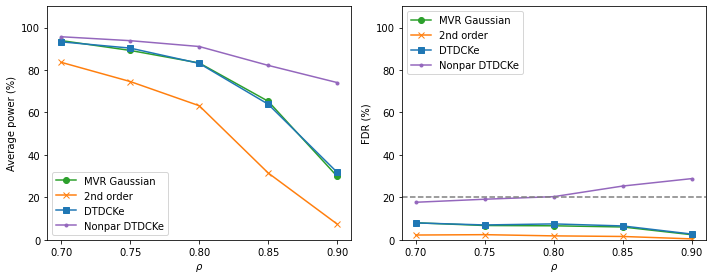

In [19]:
#Average power and FDR plots side-by-side

x_points = np.array(results.index)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(4)

y1_points = np.array(results["Gaussian Power(%)"])
y2_points = np.array(results["2do Order Power(%)"])
y3_points = np.array(results["Dvine Power(%)"])
y4_points = np.array(results["Nonpar DvinePower(%)"])


ax1.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax1.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax1.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax1.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")

ax1.set_ylim(0, 110)
ax1.set_xticks(x_points)
ax1.legend(loc="lower left")
ax1.set_xlabel(r"$\rho$")
ax1.set_ylabel("Average power (%)")


y1_points = np.array(results["Gaussian FDP(%)"])
y2_points = np.array(results["2do Order FDP(%)"])
y3_points = np.array(results["Dvine FDP(%)"])
y4_points = np.array(results["Nonpar Dvine FDP(%)"])

ax2.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax2.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax2.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax2.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")


ax2.axhline(y=20, color='tab:gray', linestyle='dashed')
ax2.set_ylim(0, 110)
ax2.set_xticks(x_points)
ax2.legend(loc="upper left")
ax2.set_xlabel(r"$\rho$")
ax2.set_ylabel("FDR (%)")

fig.tight_layout()

fig.savefig("Gaussian_linear_regression_20jul23.eps", format="eps", dpi=1200)
fig.savefig("Gaussian_linear_regression_20jul23.jpg", format="jpg", dpi=300)

fig.show()

### Gaussian logistic regression 

In [8]:
df_simulations_classification_results_1 = pd.read_csv("Gaussian_classification_results_1.csv")
df_simulations_classification_results_2 = pd.read_csv("Gaussian_classification_results_2.csv")
df_simulations_classification_results_3 = pd.read_csv("Gaussian_classification_results_3.csv")
df_simulations_classification_results_4 = pd.read_csv("Gaussian_classification_results_4.csv")
df_simulations_classification_results_5 = pd.read_csv("Gaussian_classification_results_5.csv")

In [9]:
#Data frame with all the scenarios
df_simulations_classification_results = pd.concat([df_simulations_classification_results_1, df_simulations_classification_results_2, df_simulations_classification_results_3, df_simulations_classification_results_4, df_simulations_classification_results_5], axis=0)
df_simulations_classification_results.reset_index(drop=True, inplace=True)
df_simulations_classification_results

,Unnamed: 0,Varying feature,Success rate,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%)
0,0,0.7,0.5067,95.0,95.0,95.0,100.0,0.0,0.0,0.0,9.0
1,1,0.7,0.4767,80.0,65.0,80.0,85.0,6.0,0.0,6.0,15.0
2,2,0.7,0.4967,50.0,0.0,75.0,100.0,0.0,0.0,0.0,23.0
3,3,0.7,0.5267,80.0,55.0,75.0,85.0,16.0,8.0,17.0,19.0
4,4,0.7,0.4967,75.0,55.0,80.0,85.0,6.0,8.0,6.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...
495,95,0.9,0.5067,0.0,0.0,0.0,75.0,0.0,0.0,0.0,25.0
496,96,0.9,0.4933,0.0,0.0,50.0,45.0,0.0,0.0,9.0,25.0
497,97,0.9,0.4800,0.0,0.0,65.0,70.0,0.0,0.0,13.0,26.0
498,98,0.9,0.5200,0.0,0.0,0.0,45.0,0.0,0.0,0.0,36.0


### Dataframe with the mean results 

In [10]:

classification_results = df_simulations_classification_results[["Varying feature","Gaussian Power(%)","2do Order Power(%)", "Dvine Power(%)", "Nonpar DvinePower(%)", "Gaussian FDP(%)", "2do Order FDP(%)","Dvine FDP(%)","Nonpar Dvine FDP(%)"]].groupby("Varying feature").mean()
classification_results

,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%)
Varying feature,,,,,,,,
0.70,81.65,57.90,82.30,88.70,5.61,1.22,6.28,15.13
0.75,73.90,42.70,75.15,84.65,7.27,1.39,7.67,20.07
0.80,52.60,25.95,55.95,80.45,4.11,1.42,4.94,21.90
0.85,33.55,13.20,36.85,72.10,3.19,0.80,3.40,25.58
0.90,7.80,1.65,14.15,63.10,0.96,0.26,1.62,30.32


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_3750757/684027092.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


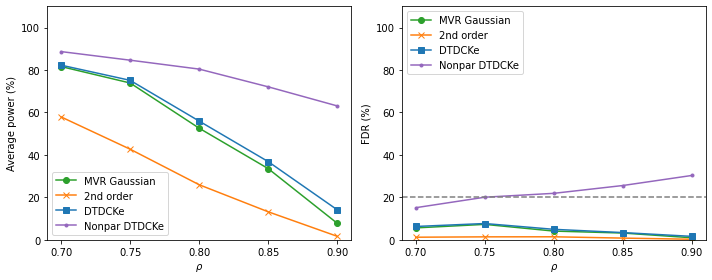

In [20]:
#Average power and FDR plots side-by-side

x_points = np.array(classification_results.index)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(4)

y1_points = np.array(classification_results["Gaussian Power(%)"])
y2_points = np.array(classification_results["2do Order Power(%)"])
y3_points = np.array(classification_results["Dvine Power(%)"])
y4_points = np.array(classification_results["Nonpar DvinePower(%)"])


ax1.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax1.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax1.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax1.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")


ax1.set_ylim(0, 110)
ax1.set_xticks(x_points)
ax1.legend(loc="lower left")
ax1.set_xlabel(r"$\rho$")
ax1.set_ylabel("Average power (%)")


y1_points = np.array(classification_results["Gaussian FDP(%)"])
y2_points = np.array(classification_results["2do Order FDP(%)"])
y3_points = np.array(classification_results["Dvine FDP(%)"])
y4_points = np.array(classification_results["Nonpar Dvine FDP(%)"])

ax2.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax2.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax2.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax2.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")

ax2.axhline(y=20, color='tab:gray', linestyle='dashed')
ax2.set_ylim(0, 110)
ax2.set_xticks(x_points)
ax2.legend(loc="upper left")
ax2.set_xlabel(r"$\rho$")
ax2.set_ylabel("FDR (%)")

fig.tight_layout()

fig.savefig("Gaussian_logistic_regression_20jul23.eps", format="eps", dpi=1200)
fig.savefig("Gaussian_logistic_regression_20jul23.jpg", format="jpg", dpi=300)

fig.show()